<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Statistical Treatment for Datasets</font></h1>

## Credit Card Customers

Customer attrition can have serious financial consequences for a business. Product and service offering has to be more innovative than that of competitors to entice customers to buy and remain loyal. Retaining satisfied customers is generally cheaper than acquiring new ones. Therefore, a customer retention strategy can be employed if we know which customer is likely to attrite.

This Notebook presents a solution to the problem of identifying churned customers using Machine Learning techniques. The dataset is retrieved from https://www.kaggle.com/sakshigoyal7/credit-card-customers and consists of 10,000 bank customers. For each customer, the dataset includes the following variables:

**Demographic:**

* Age
* Gender

**Socioeconomic:**

* Salary
* Education level
* Marital status
* Dependent

**Business related: **

* Credit card category
* Credit card limit
* Duration of relationship with a customer
* Total number of products held
* Months inactive in the last 12 months
* Number of contacts in the last 12 months
* Total revolving balance on the credit card
* Open to buy credit line (Average over the last 12 months)
* Change in transaction amount (Q4 to Q1)
* Total transaction amount in the last 12 months
* Total transaction count in the last 12 months
* Average card utilization ratio

# Data Preparation

In [1]:
# Load the library you need.
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

In [2]:
# Load your dataset here
df = pd.read_csv('dataset/BankChurners.csv',sep=",")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


To view the dimensions of the dataframe, we use the `.shape` parameter. 

In [5]:
df.shape
print(f"Data Row, Data Column : ", df.shape)

Data Row, Data Column :  (10127, 23)


To check the column's dtype and whether each columns has null or not, we use the `.info` parameter. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

There are no missing values in the dataset.

The variables CLIENTNUM and the two Naive_Bayes_Classifiers are removed as they are not useful in this analysis.

In [7]:
Delete_var = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                       'CLIENTNUM']

df.drop(Delete_var, axis=1, inplace=True)

# Data Analysis 

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56
Total_Relationship_Count,10127,NaN,NaN,NaN,3.81258,1.55441,1,3,4,5,6


Our target is attrition flag, let's plot its proportion in data and proportion some variables to each attrition flag category

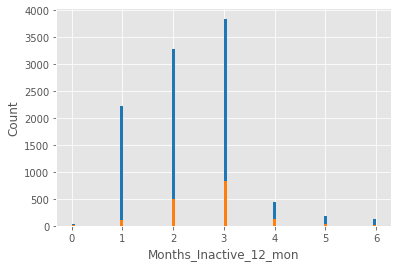

In [9]:
plt.hist([
    df['Months_Inactive_12_mon'].loc[df['Attrition_Flag'] == 'Attrited Customer'],
    df['Months_Inactive_12_mon'].loc[df['Attrition_Flag'] != 'Attrited Customer']], 
    bins=100, stacked=True, color=['tab:orange','tab:blue']
)
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Count')
plt.show()

Given the variable Months_Inactive_12_mon, with bins 0,1,...,6, the above graph represents a stacked bar plot. The horizontal axis represents the bins. The vertical axis represents the number of individuals. The height of an orange-colored bar represents the numberof attrited customers in a bin. The length of a blue bar represents the number of existing customers. The total height of both bars combined represents the total number of individuals in a bin. Note that to retrieve the number of existing customers, we have to subtract the total number of individuals by the amount of attrited customers.

To illustrate: the total number of individuals belonging to category 3 is roughly 3800. The amount of attrited customers is roughly 800. Consequently, the amount of existing customers is around 3000.

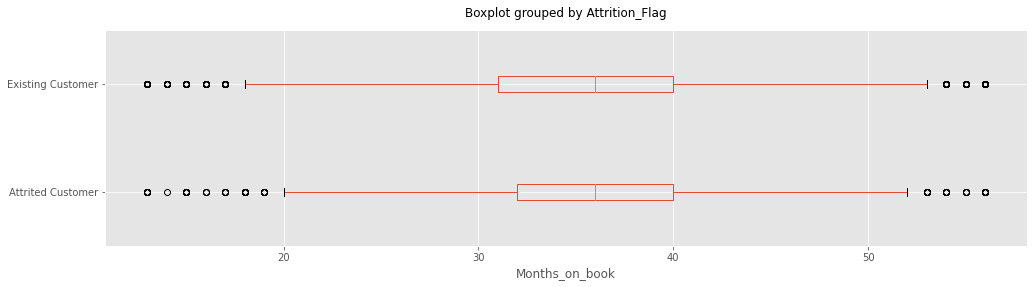

In [10]:
d = pd.DataFrame(df[['Months_on_book', 'Attrition_Flag']].copy())
        
m = d.boxplot(by='Attrition_Flag', vert=False, figsize=(16, 4))
m.set_xlabel('Months_on_book')
m.set_title('')
plt.show()

The above graph is a boxplot. The black circles indicate outliers. The vertical black bar at the far left of the line segment is the minimum value (excluding outliers). The first quantile is represented at the far left side of the box. The median is represented by the vertical blue line. The third quantile is represented at the far right side of the box. The maximum value (excluding outliers) and fourth quantile is represented by the vertical black bar at the far right of the line segment.

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


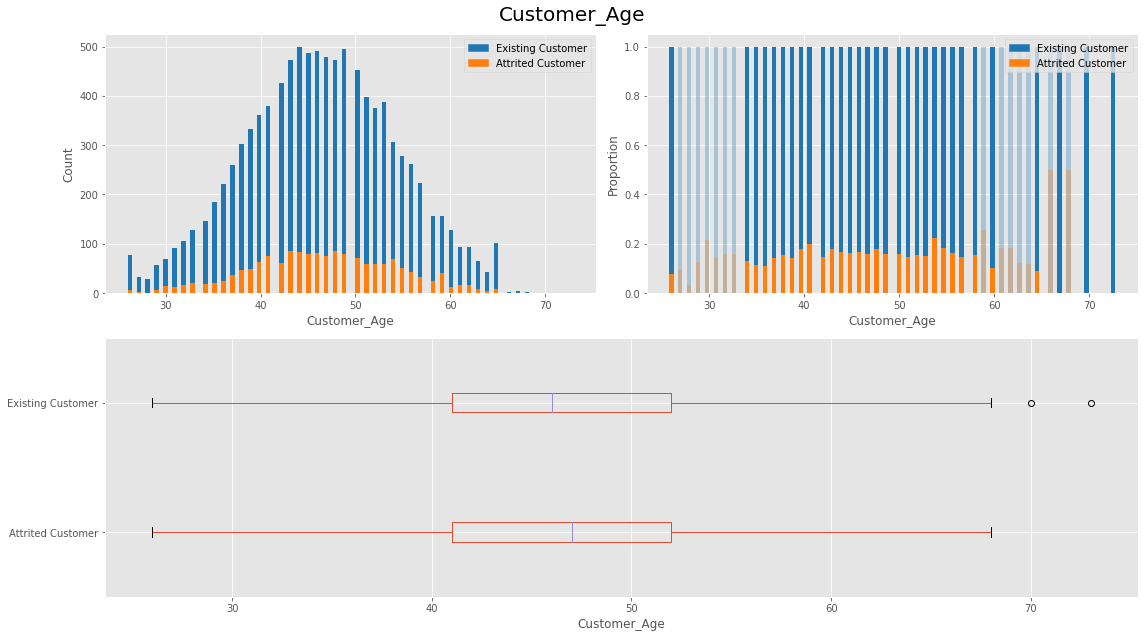

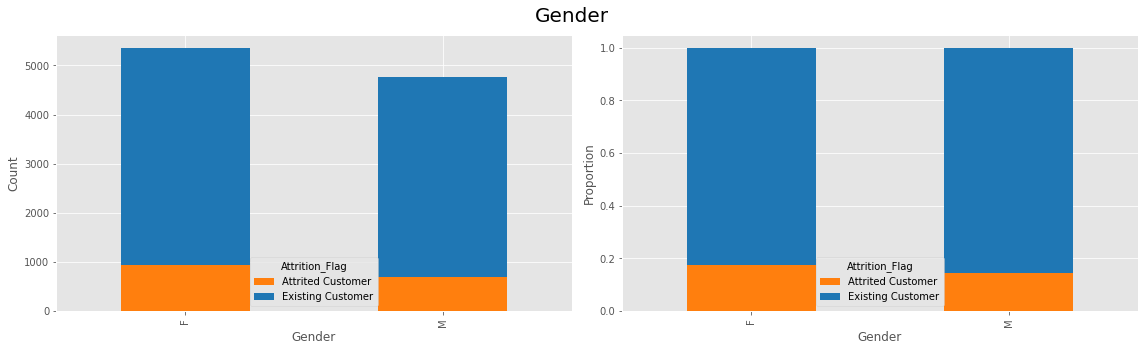

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


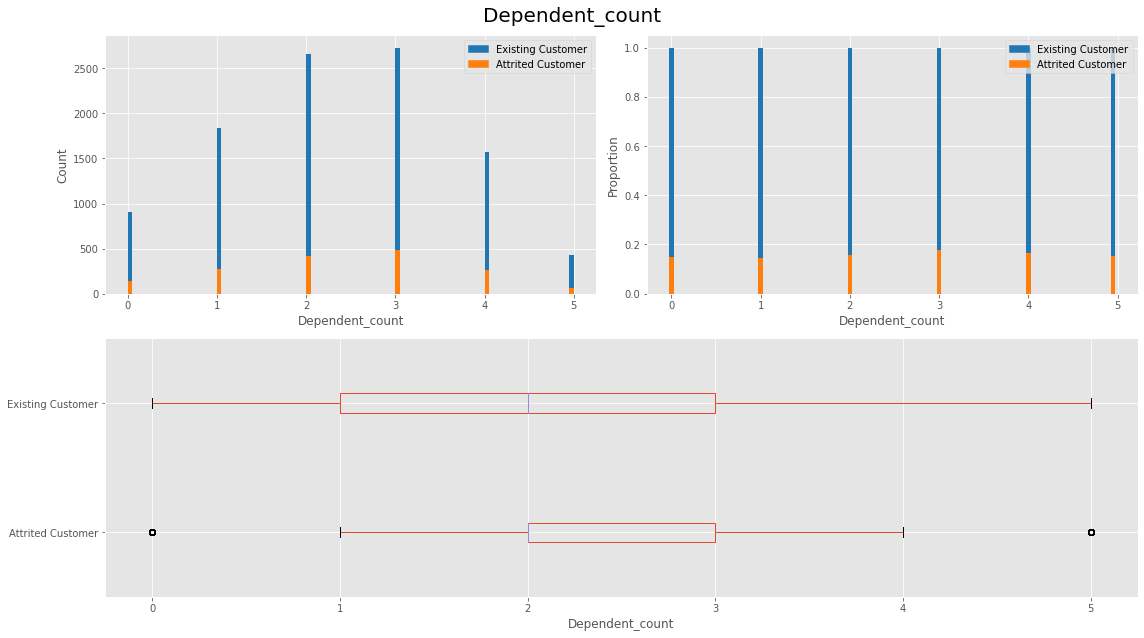

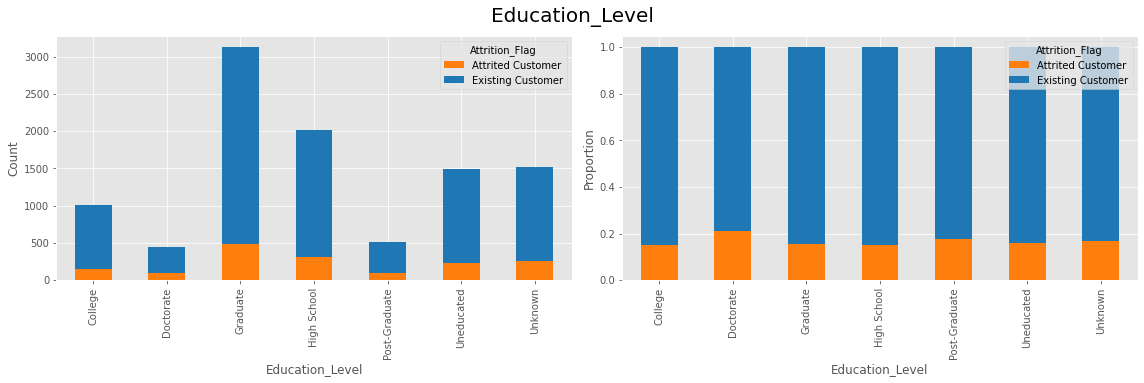

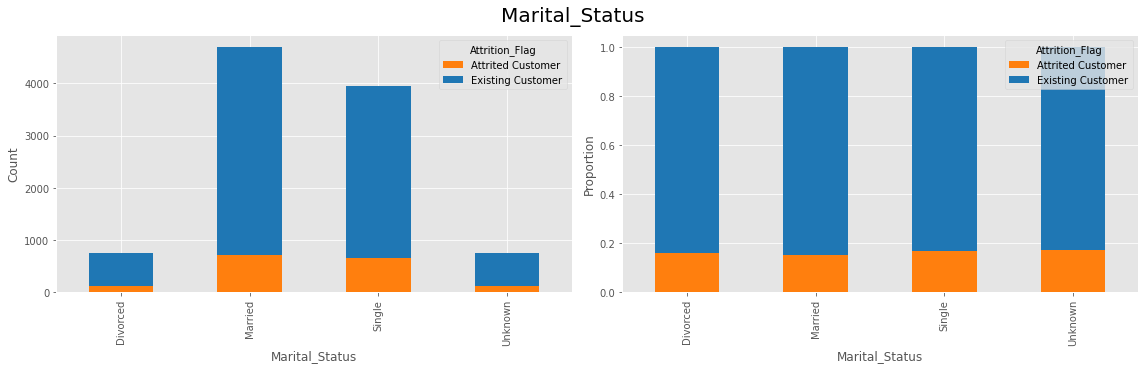

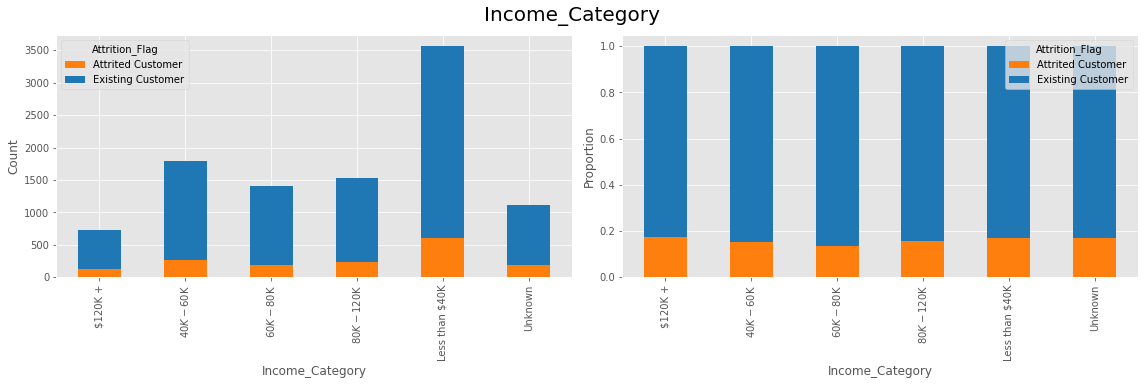

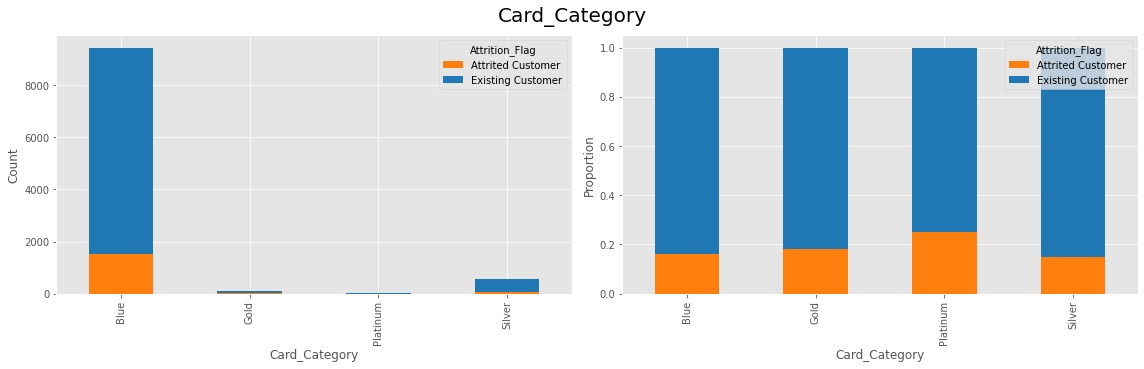

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


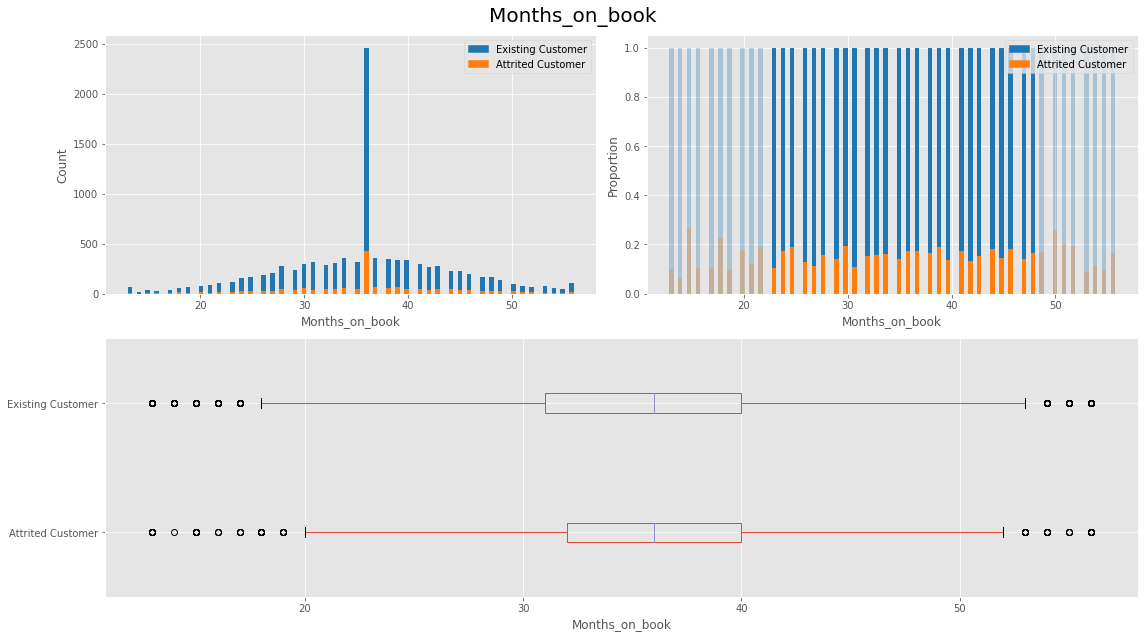

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


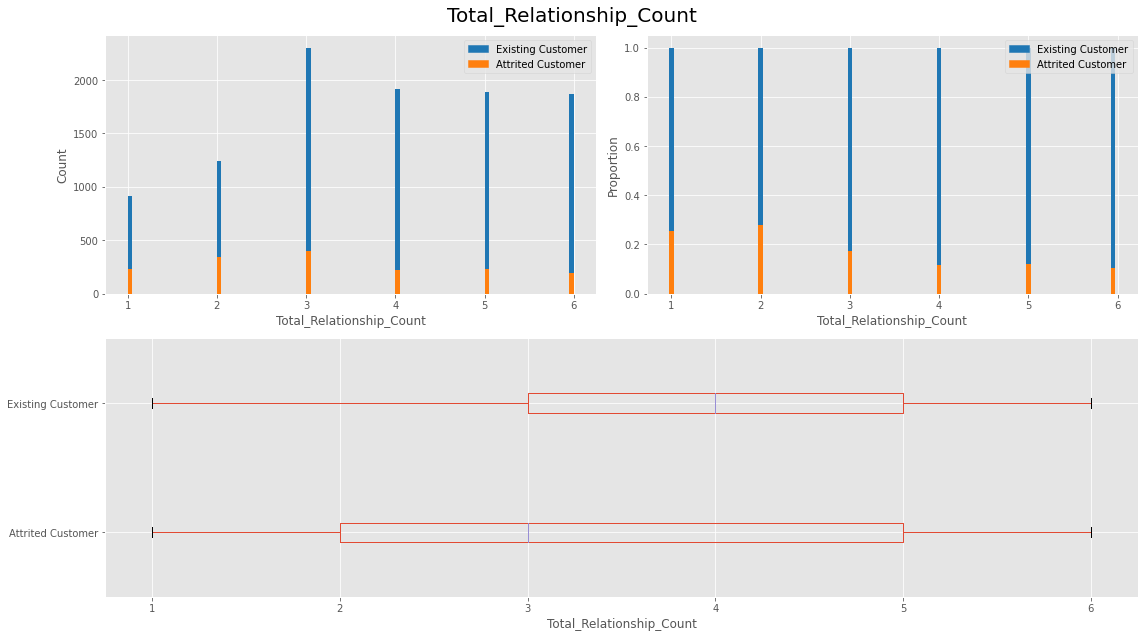

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


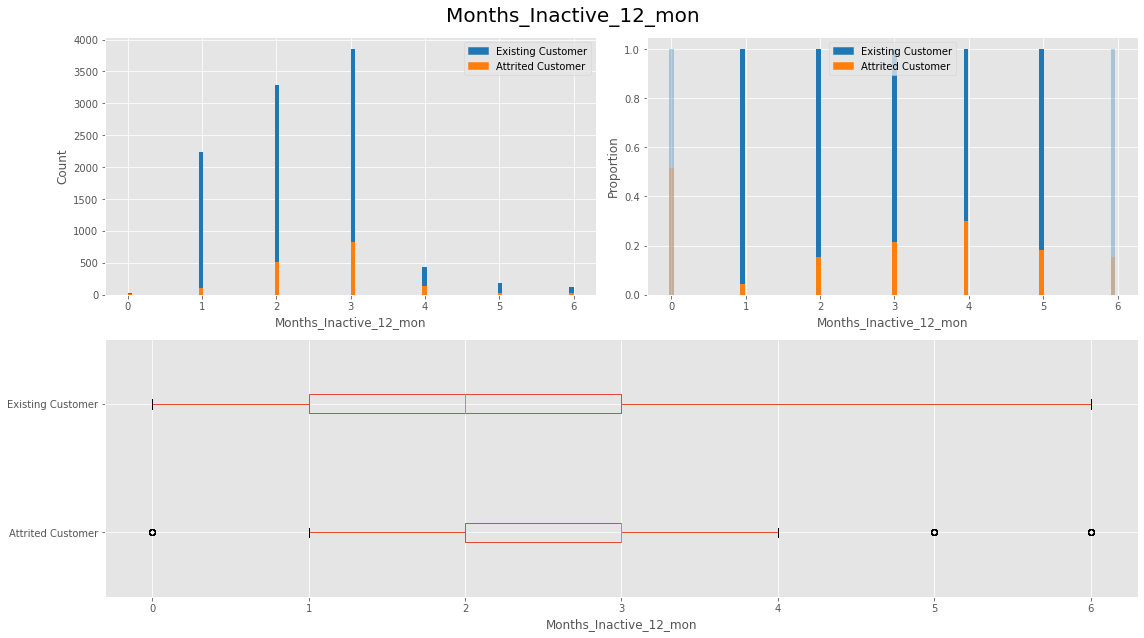

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


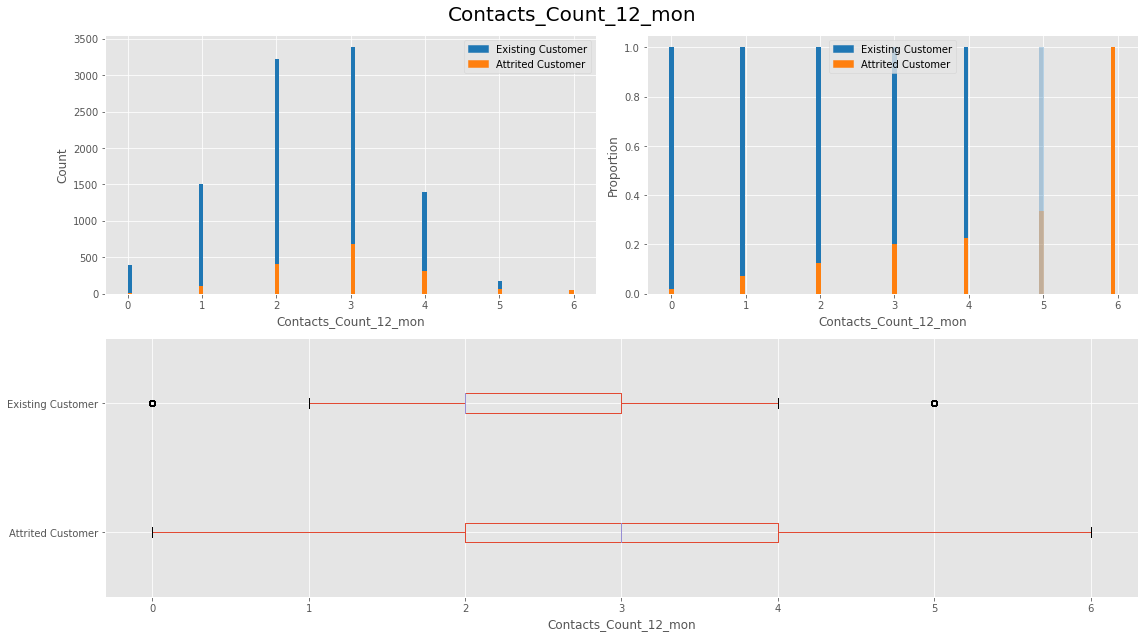

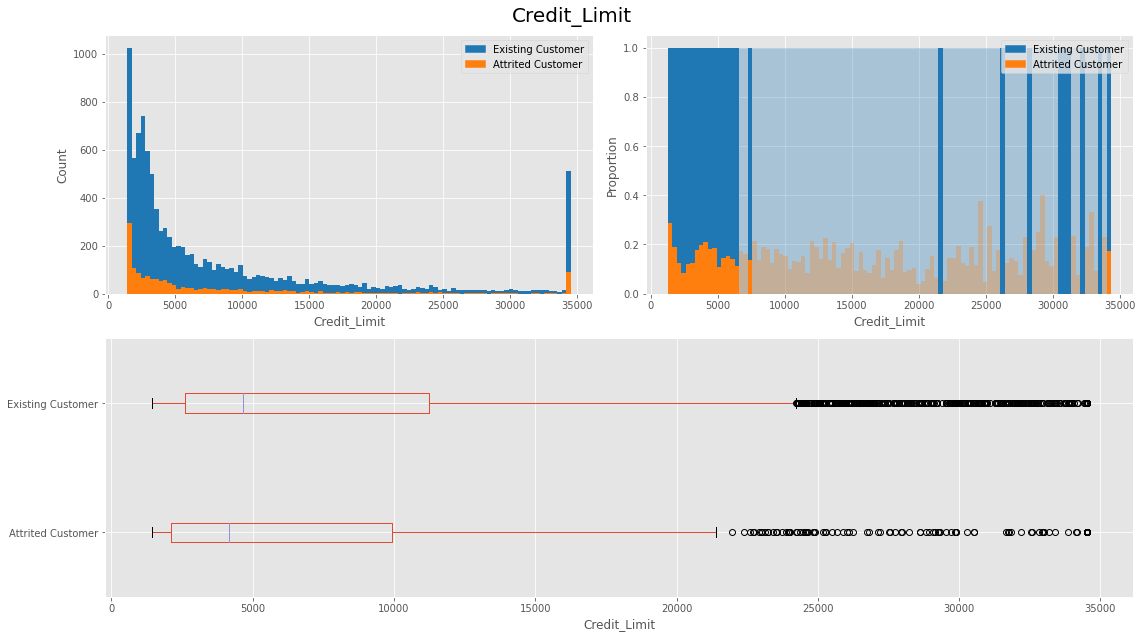

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


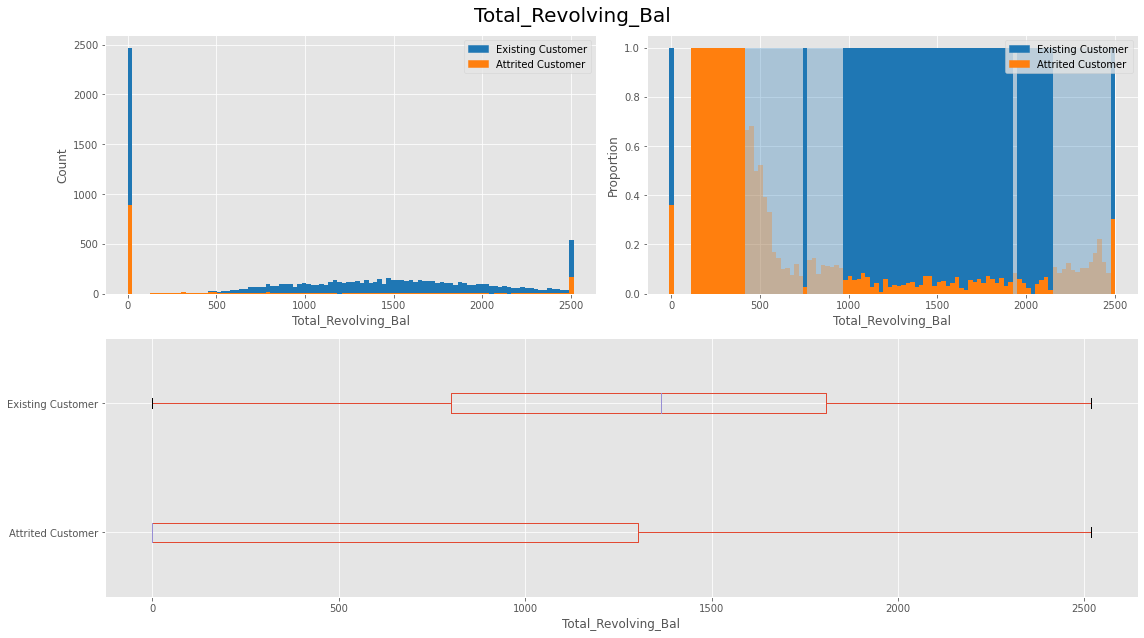

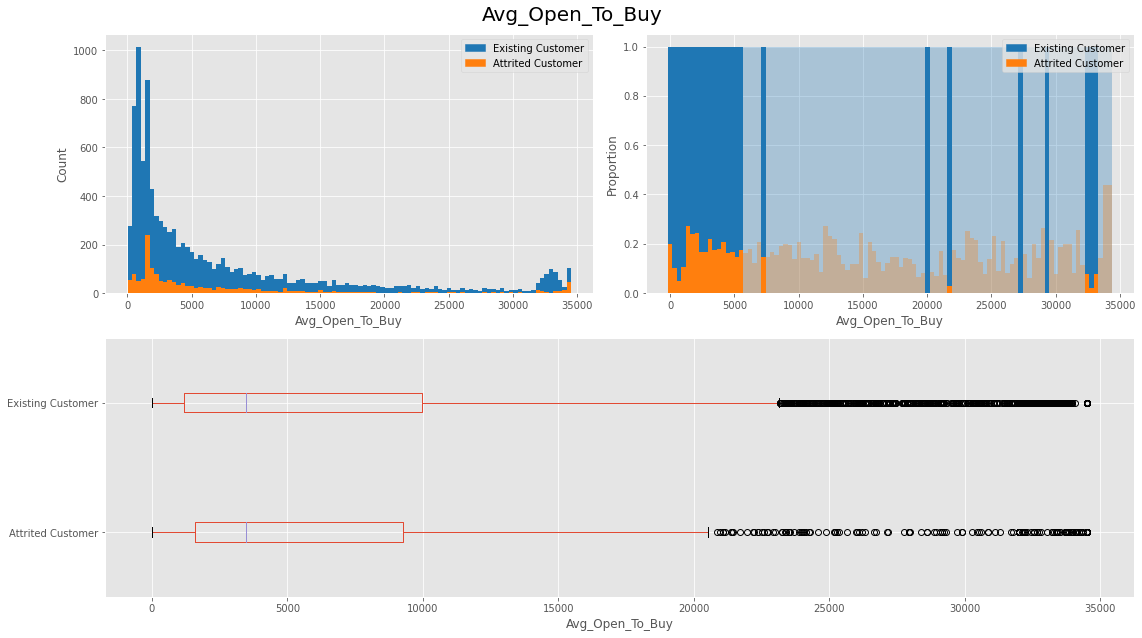

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


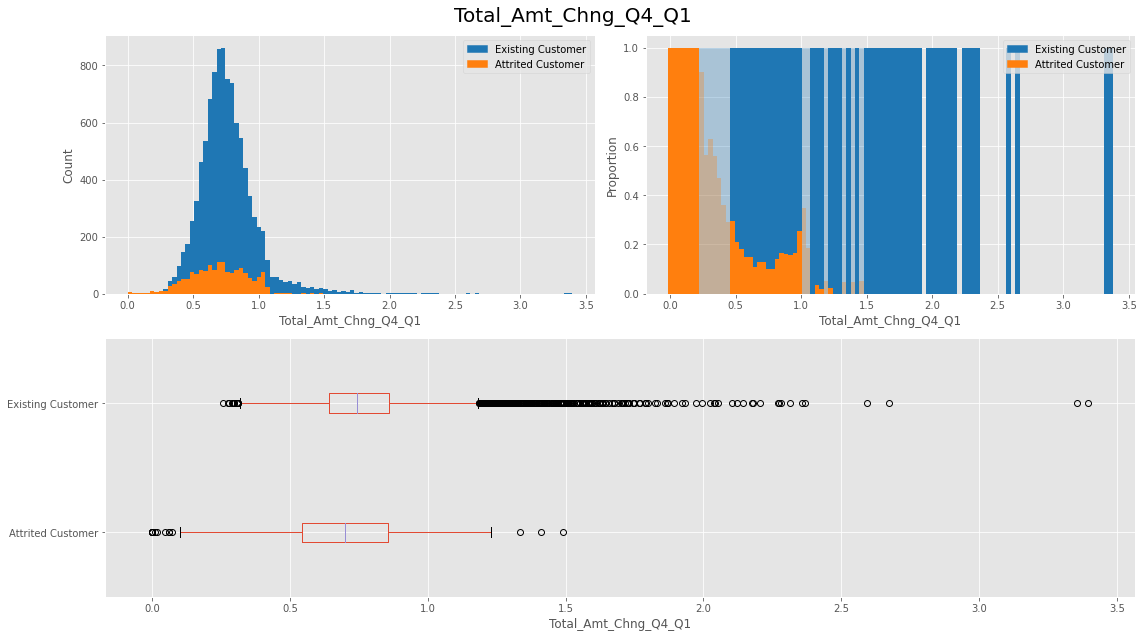

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


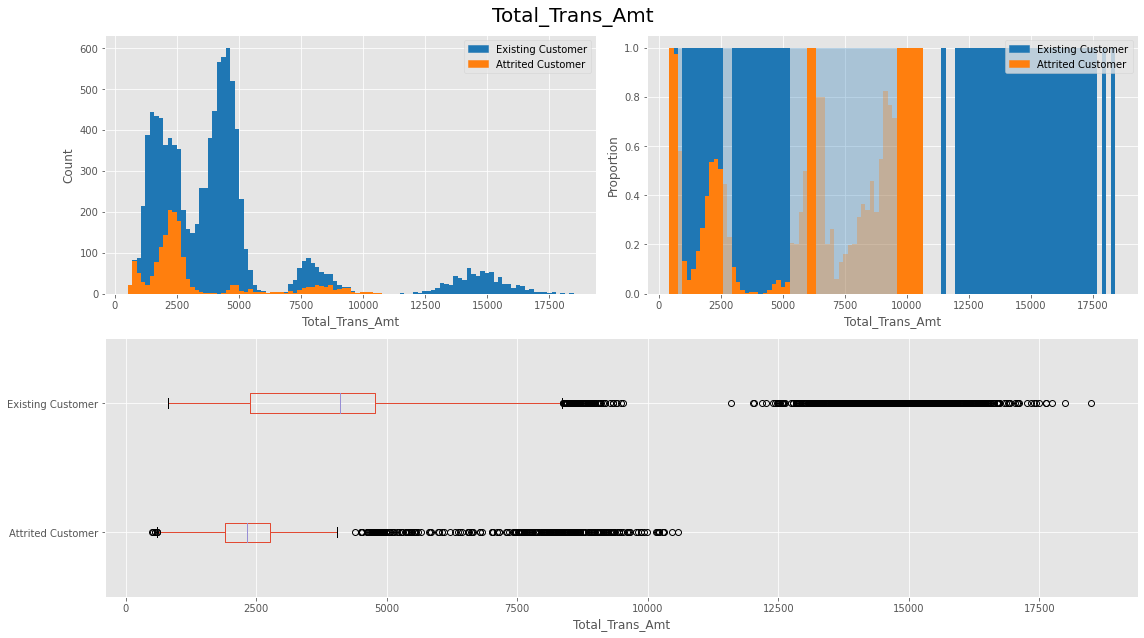

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


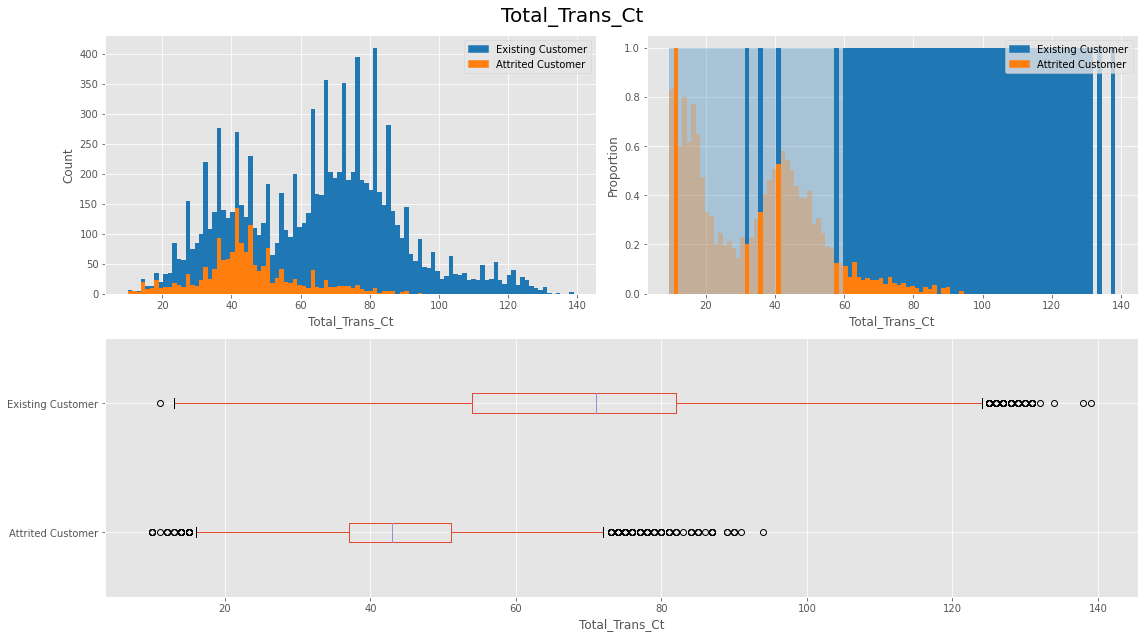

<ipython-input-11-a4089f2b3aff>:49: RuntimeWarning: invalid value encountered in true_divide
  pp = zz.values / amount
<ipython-input-11-a4089f2b3aff>:55: RuntimeWarning: invalid value encountered in less
  mm = (stDev*1.96*2 < 0.12)
<ipython-input-11-a4089f2b3aff>:56: RuntimeWarning: invalid value encountered in greater_equal
  mm2 = (stDev*1.96*2  >= 0.12)


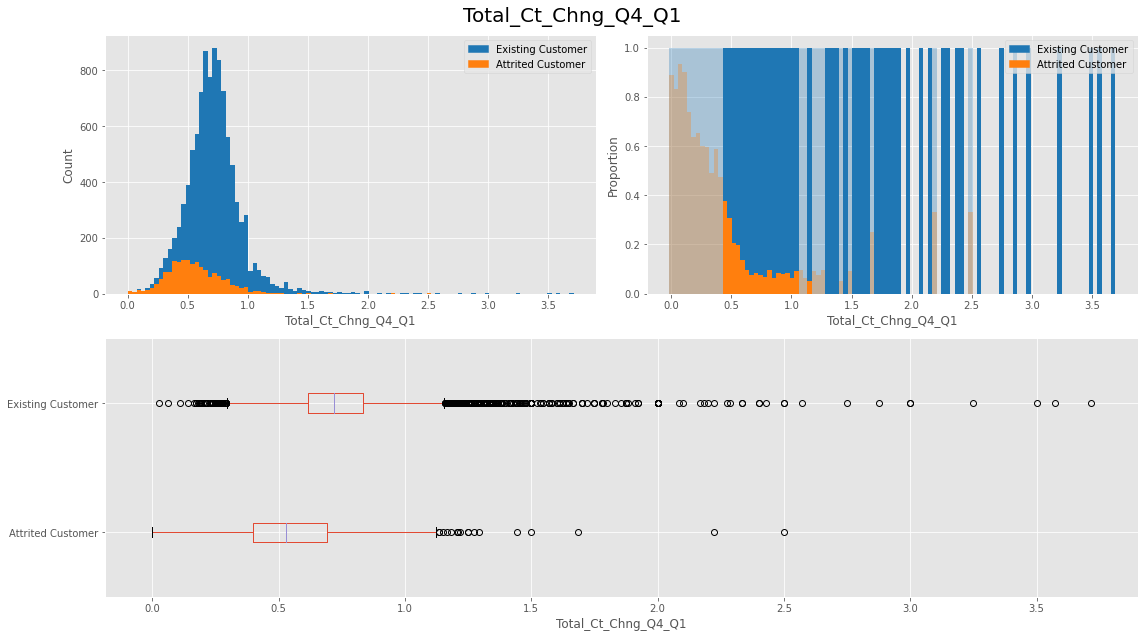

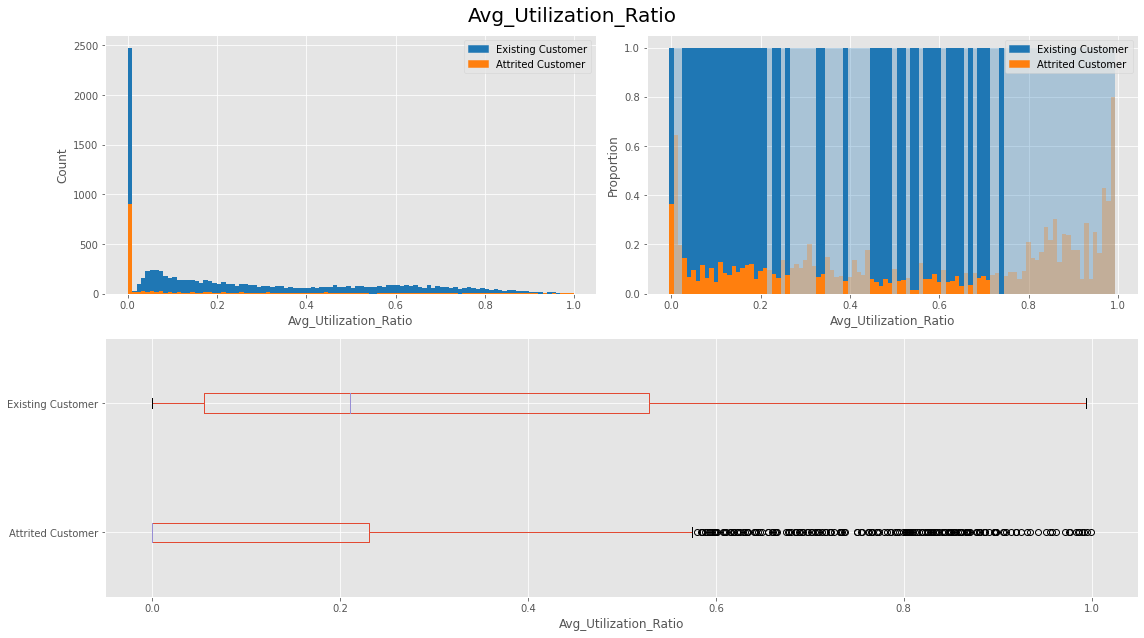

In [11]:
names = list(df.columns) 
categorical_names = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_names = [c for c in names if c not in categorical_names + ['Attrition_Flag']]

target = 1.0 * (df['Attrition_Flag'] != 'Existing Customer')
    
for i, name in enumerate(names):
    if name == 'Attrition_Flag':
        continue
    
    fig = plt.figure(figsize=(16, 9))
    
    ax11 = fig.add_subplot(2,2,1)
    ax11.set_ylabel('Count')
    
    ax21 = fig.add_subplot(2,2,2)
    ax21.set_ylabel('Proportion')
    
    if name in categorical_names:
        
        # stacked bar categorical for counting
        q = df.groupby([name, 'Attrition_Flag']).size().unstack()
        q.plot(kind='bar', ax=ax11, stacked=True, color=['tab:orange','tab:blue'])
        ax11.set_ylabel('Count')
             
        # stacked bar categorical proportion
        ((q.T/q.sum(1).values).T).plot(kind='bar', ax=ax21, stacked=True, color=['tab:orange','tab:blue'])

    else:        
        # create stacked bar plot for counting (100 bins are used)
        ax11.hist([df[name].loc[target == 1],df[name].loc[target == 0]],
          bins=100, stacked=True, color=['tab:orange','tab:blue'])
        
        
        # create the boxplot figure
        d = pd.DataFrame(df[[name, 'Attrition_Flag']].copy())
        ax2 = fig.add_subplot(2,1,2, sharex = ax11)
        d.boxplot(by='Attrition_Flag', ax=ax2, vert=False)
        ax2.set_xlabel(name)
        ax2.set_title('')
        
        # divide a continous feature into 100 bins
        amount, edges = np.histogram(df[name], bins=100)
        edges[-1] += 1e-5
        
        zz = pd.cut(df[name].loc[target==1], edges, right=False).value_counts().sort_index()
        
        # calculate the proportion of attrited customer in each bi
        pp = zz.values / amount
        
        # calculate the standard devation of the probabilities
        stDev = np.sqrt(pp*(1 - pp) / amount)
        
        # determine length of confidence interval
        mm = (stDev*1.96*2 < 0.12)
        mm2 = (stDev*1.96*2  >= 0.12)
        
        # plot bins
        ax21.bar(edges[:-1][mm], amount[mm]/ amount[mm], width=np.diff(edges)[mm], color='tab:blue')
        ax21.bar(edges[:-1][mm], zz.values[mm]/amount[mm], width=np.diff(edges)[mm], color='tab:orange')
        
        # faded out bins
        ax21.bar(edges[:-1][mm2], amount[mm2]/ amount[mm2], width=np.diff(edges)[mm2], alpha=0.3, color='tab:blue')
        ax21.bar(edges[:-1][mm2], zz.values[mm2]/amount[mm2], width=np.diff(edges)[mm2], alpha=0.3, color='tab:orange')
     
        # make it fancy
        colors = {'Existing Customer':'tab:blue', 'Attrited Customer':'tab:orange'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        ax11.legend(handles, labels)
        ax21.legend(handles, labels)
        
    # make it even more fancy
    fig.suptitle(name, size=20) 
    ax11.set_xlabel(name)
    ax21.set_xlabel(name)
    fig.tight_layout()
    plt.show()

Several observations can be made from the above figures:

* The distribution of most continuous features appears to have heavy tails (high skewness). This might distort our model's learning process.
* In some bins there are relatively few observations. This adds to the uncertainty that our sample might not represent the attributes of the true population. Therefore, our model might have more trouble generalizing to unobserved data. A larger dataset might resolve this.
* Some features appear to have multimodal distributions (Total_Trans_Ct, Total_Trans_Amt). This might indicate heterogeneity and the presence of subgroups. These features can be particularly interesting for modeling.

**Correlation**

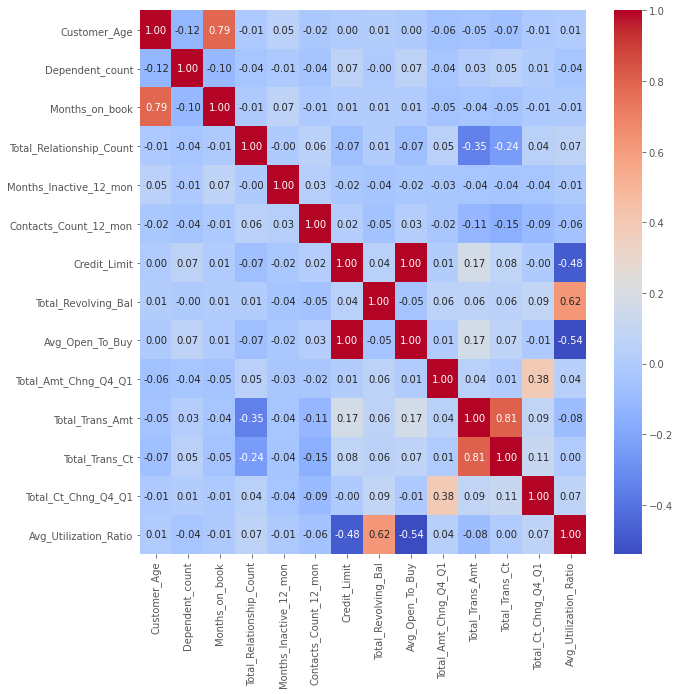

In [12]:
g = sns.heatmap(df.corr(),annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

From the correlation figure above, we can induce that the correlation between Avg_Open_To_Buy and Credit_limit is close to 1. One of these features can be dropped since correlated features generally don't improve model performance. 

# Model Training

In [13]:
df2 = df.copy()

In [14]:
gender_flag = pd.get_dummies(df2['Gender'],drop_first=True)
df2.drop(['Gender'], axis=1, inplace=True)
df2 = pd.concat([df2, gender_flag], axis=1)

marital_flag = pd.get_dummies(df2['Marital_Status'],drop_first=True)
df2.drop(['Marital_Status'], axis=1, inplace=True)
df2 = pd.concat([df2, marital_flag], axis=1)

edu_flag = pd.get_dummies(df2['Education_Level'],drop_first=True)
df2.drop(['Education_Level'], axis=1, inplace=True)
df2 = pd.concat([df2, edu_flag], axis=1)

card_flag = pd.get_dummies(df2['Card_Category'],drop_first=True)
df2.drop(['Card_Category'], axis=1, inplace=True)
df2 = pd.concat([df2, card_flag], axis=1)

income_flag = pd.get_dummies(df2['Income_Category'],drop_first=True)
df2.drop(['Income_Category'], axis=1, inplace=True)
df2 = pd.concat([df2, income_flag], axis=1)



In [15]:
df2.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Uneducated,Unknown,Gold,Platinum,Silver,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,0,0,0,1,0,0,0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,0,0,0,0,1,0
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,0,0,0,1,0,0
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,0,0,0,1,0
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,0,0,1,0,0,0


In [16]:
y = (df2['Attrition_Flag'] == 'Attrited Customer').astype(int)
X = df2.drop('Attrition_Flag', axis=1).copy()
X.drop('Avg_Open_To_Buy', axis=1, inplace=True)


In [17]:
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualitation")
    plot_confusion_matrix(model, X_test, y_test)

## <font color="darkblue">Support Vector Machines

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training SVC in 1.392s
Training performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5927
           1       0.78      0.58      0.67      1161

    accuracy                           0.90      7088
   macro avg       0.85      0.77      0.80      7088
weighted avg       0.90      0.90      0.90      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2573
           1       0.79      0.58      0.67       466

    accuracy                           0.91      3039
   macro avg       0.86      0.78      0.81      3039
weighted avg       0.91      0.91      0.91      3039

Testing Data Confusion Matrix Visualitation


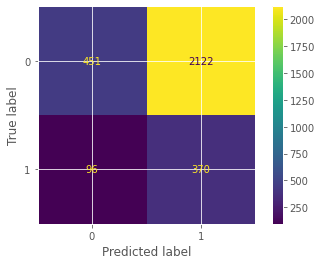

In [18]:
train_model(X,y,SVC(kernel="linear"))

## <font color="darkblue">K-Nearest Neighbors

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=109
)

In [20]:
#1. Let's find out the optimal value for k
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.11648568608094768, 0.10299440605462323, 0.10200723922342876, 0.10233629483382692, 0.10069101678183613, 0.10102007239223429, 0.10365251727541955, 0.10134912800263245, 0.1016781836130306, 0.09904573872984535, 0.10036196117143797, 0.09740046067785456, 0.09904573872984535, 0.09871668311944719, 0.09772951628825272, 0.0993747943402435, 0.09575518262586377, 0.09674234945705824, 0.0970714050674564, 0.09805857189865087, 0.09772951628825272, 0.0970714050674564, 0.09871668311944719, 0.0993747943402435, 0.0993747943402435, 0.0993747943402435, 0.09970384995064166, 0.10102007239223429, 0.10003290556103982, 0.1016781836130306, 0.10069101678183613, 0.10233629483382692, 0.10069101678183613, 0.10102007239223429, 0.10102007239223429, 0.10200723922342876, 0.10233629483382692, 0.10200723922342876, 0.10365251727541955]


Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training KNeighborsClassifier in 0.079s
Training performance:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      5927
           1       0.94      0.17      0.29      1161

    accuracy                           0.86      7088
   macro avg       0.90      0.58      0.60      7088
weighted avg       0.87      0.86      0.82      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2573
           1       0.92      0.16      0.27       466

    accuracy                           0.87      3039
   macro avg       0.90      0.58      0.60      3039
weighted avg       0.88      0.87      0.83      3039

Testing Data Confusion Matrix Visualitation


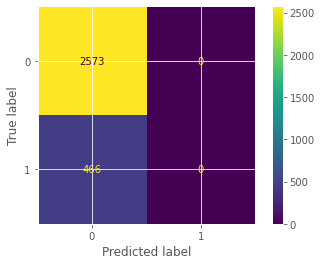

In [21]:
train_model(X,y,KNeighborsClassifier(n_neighbors=39))

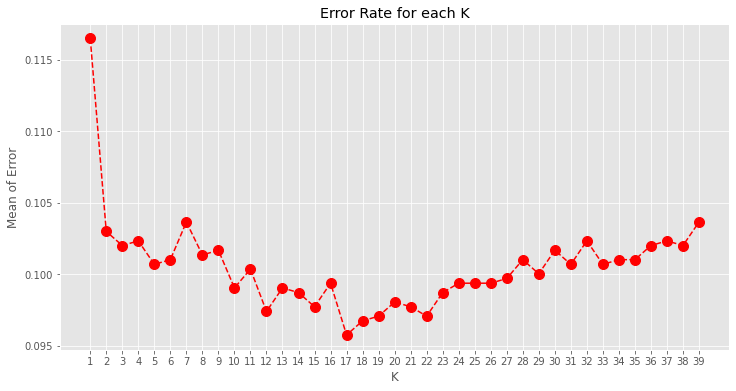

In [22]:
#2 Now plot the error value for each K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training KNeighborsClassifier in 0.097s
Training performance:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5927
           1       0.91      0.26      0.40      1161

    accuracy                           0.87      7088
   macro avg       0.89      0.63      0.67      7088
weighted avg       0.88      0.87      0.84      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2573
           1       0.89      0.22      0.35       466

    accuracy                           0.88      3039
   macro avg       0.88      0.61      0.64      3039
weighted avg       0.88      0.88      0.84      3039

Testing Data Confusion Matrix Visualitation


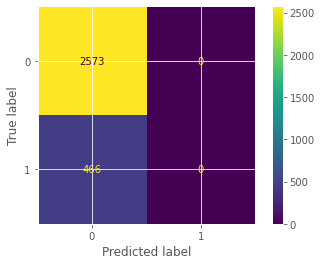

In [23]:
#3. Since the lowest error on K=17, then we'll set the n_neighbors =17
train_model(X,y,KNeighborsClassifier(n_neighbors=17))

## <font color="darkblue">Decision Tree

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training DecisionTreeClassifier in 0.061s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      1161

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2573
           1       0.80      0.82      0.81       466

    accuracy                           0.94      3039
   macro avg       0.89      0.89      0.89      3039
weighted avg       0.94      0.94      0.94      3039

Testing Data Confusion Matrix Visualitation


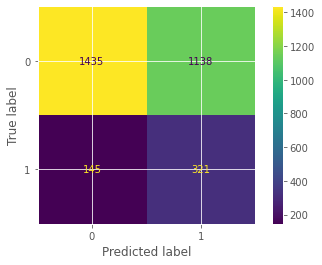

In [24]:
train_model(X,y,DecisionTreeClassifier(criterion="entropy"))

## <font color="darkblue">Naive Bayes

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training GaussianNB in 0.008s
Training performance:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5927
           1       0.69      0.59      0.64      1161

    accuracy                           0.89      7088
   macro avg       0.81      0.77      0.79      7088
weighted avg       0.88      0.89      0.89      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2573
           1       0.66      0.58      0.61       466

    accuracy                           0.89      3039
   macro avg       0.79      0.76      0.78      3039
weighted avg       0.88      0.89      0.89      3039

Testing Data Confusion Matrix Visualitation


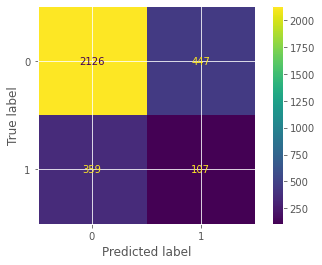

In [25]:
train_model(X,y,GaussianNB())

## <font color="darkblue">Random Forest

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training RandomForestClassifier in 0.809s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      1161

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2573
           1       0.93      0.78      0.85       466

    accuracy                           0.96      3039
   macro avg       0.95      0.88      0.91      3039
weighted avg       0.96      0.96      0.96      3039

Testing Data Confusion Matrix Visualitation


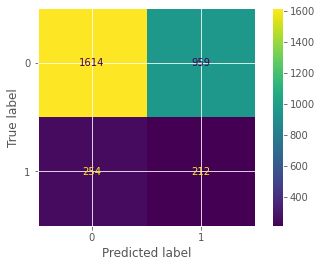

In [26]:
train_model(X,y,RandomForestClassifier())


## <font color="darkblue">Logistic Regression

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training LogisticRegression in 0.038s
Training performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5927
           1       0.77      0.58      0.66      1161

    accuracy                           0.90      7088
   macro avg       0.85      0.77      0.80      7088
weighted avg       0.90      0.90      0.90      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2573
           1       0.76      0.59      0.66       466

    accuracy                           0.91      3039
   macro avg       0.84      0.78      0.81      3039
weighted avg       0.90      0.91      0.90      3039

Testing Data Confusion Matrix Visualitation


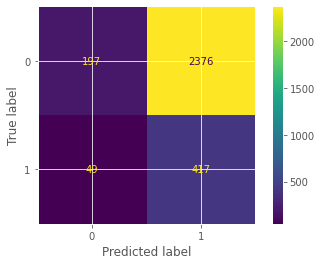

In [27]:
train_model(X,y,LogisticRegression())

# Comparing All Algorithms

=== Using LogisticRegression ===
Training with 4961 data.. Validating with 2127..
Standardizing data..
Done training LogisticRegression in 0.033s
Training performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4143
           1       0.77      0.60      0.68       818

    accuracy                           0.91      4961
   macro avg       0.85      0.78      0.81      4961
weighted avg       0.90      0.91      0.90      4961

Testing performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1784
           1       0.75      0.57      0.65       343

    accuracy                           0.90      2127
   macro avg       0.84      0.77      0.80      2127
weighted avg       0.89      0.90      0.90      2127

Testing Data Confusion Matrix Visualitation
=== Using DecisionTreeClassifier ===
Training with 4961 data.. Validating with 2127..
Standardizing data..
Done t

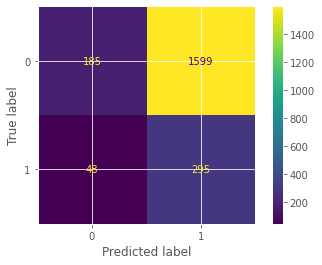

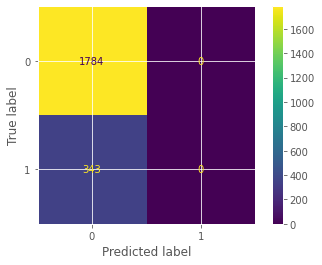

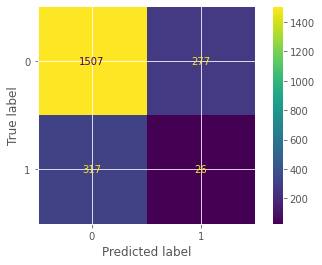

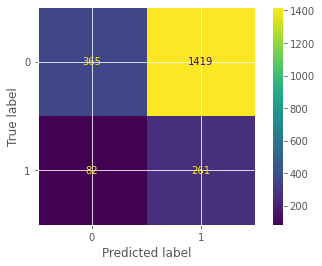

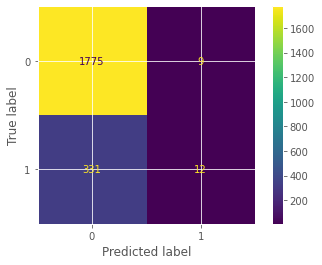

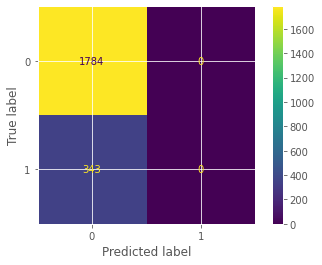

In [28]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion="entropy"),
    RandomForestClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=39)
]

for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X_train, y_train, model)

As we can see above the best model is the one that developed with Random Forest, due to the stable model accuracy between data train and data testing based on f1-score criteria.

Now, let's see the importance of each features based on Random Forest Model!

Training with 7088 data.. Validating with 3039..
Standardizing data..
Done training RandomForestClassifier in 0.818s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      1161

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

Testing performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2573
           1       0.93      0.77      0.84       466

    accuracy                           0.96      3039
   macro avg       0.94      0.88      0.91      3039
weighted avg       0.95      0.96      0.95      3039

Testing Data Confusion Matrix Visualitation


Total_Trans_Amt             0.176530
Total_Trans_Ct              0.158160
Total_Ct_Chng_Q4_Q1         0.112602
Total_Revolving_Bal         0.107564
Avg_Utilization_Ratio       0.070351
Total_Amt_Chng_Q4_Q1        0.065001
Total_Relationship_Count    0.061497
Credit_Limit                0.039589
Customer_Age                0.035407
Contacts_Count_12_mon       0.031328
Months_Inactive_12_mon      0.029569
Months_on_book              0.028694
Dependent_count             0.014802
M                           0.010231
Married                     0.006829
Single                      0.005281
Less than $40K              0.005004
Graduate                    0.004674
High School                 0.004151
Uneducated                  0.003857
$40K - $60K                 0.003745
$60K - $80K                 0.003660
$80K - $120K                0.003659
Unknown                     0.003547
Unknown                     0.003049
Unknown                     0.002543
Silver                      0.002427
D

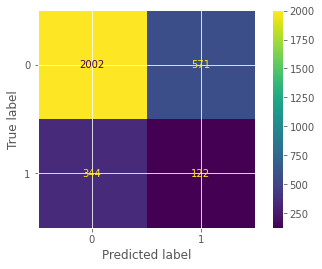

In [29]:
model = RandomForestClassifier()
train_model(X, y, model)

Feature_importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
Feature_importance

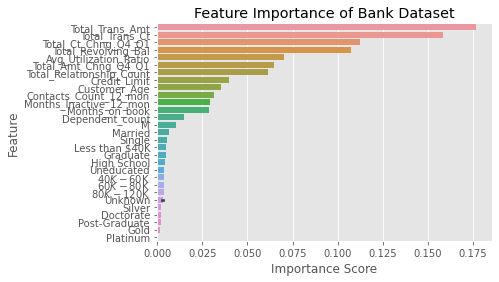

In [30]:
# Plot the feature importance
sns.barplot(x=Feature_importance, y=Feature_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Bank Dataset")
plt.show()

The above figures visualizes the relative importance of each feature, based on the importance score. The higher the value, the better a predictor. The top 5 predictors are

* (1) Total_Trans_Amt
* (2) Total_Trans_Ct
* (3) Total_Revolving_Bal
* (4) Total_Trans_Ct x Total_Ct_Chng_Q4_Q1
* (5) Total_Relationship_Count

As expected, the variables with a multimodal distribution are among the best predictors. The third best predictor is the interaction effect between Total_Trans_Ct and Total_Ct_Chng_Q4_Q1. The other interaction effects are less important predictors. For a follow-up study, it might be interesting to analyze customer segmentation.